In [ ]:
import os                                                                       #Rūtos_Ciparytės
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization, \
                                    ZeroPadding2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
#uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cwd = os.getcwd()
print(cwd)
os.listdir(os.getcwd())

/content


['.config', 'drive', 'sample_data']

In [ ]:
import gzip
import pickle

X,y = pickle.load(gzip.open('/content/drive/MyDrive/flatland_train.data','rb'))
y[y != 0] -= 2
X = X.reshape(X.shape[0], 50, 50, 1) / 255.0


In [ ]:
#flatland = pd.read_csv('flatland_train.data',encoding = "ISO-8859-1",index_col=None, header=0, engine='python') []

In [ ]:
#one_of_old_models
'''
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(),
              metrics=["accuracy"])
model.summary()
'''

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=[50, 50, 1]))
#model.add(ZeroPadding2D((6, 6)))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(ZeroPadding2D((1, 1)))

model.add(BatchNormalization(axis=-1)) #let's skip some nodes
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(MaxPooling2D((2, 2)))



model.add(Flatten())
model.add(Dense(5, activation='softmax'))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=Adam(learning_rate=3e-4),
              metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 19, 19, 128)       147584    
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 17, 17, 128)      

In [ ]:
#another attempt, but it was giving an 'could not handle the request' on the site https://us-central1-aiprimer.cloudfunctions.net/flatland?model_link=[...]
'''
model = Sequential()
model.add(ZeroPadding2D((6, 6), input_shape=[50, 50, 1])) #adding some padding we don't want to accidentaly lose information
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name='2_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name='2_2'))


model.add(BatchNormalization(axis=-1)) #let's skip some nodes
model.add(MaxPooling2D((2, 2)))

model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', name='3_1'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', name='3_2'))
model.add(ZeroPadding2D((1, 1)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', name='3_3'))

model.add(MaxPooling2D((2, 2)))


model.add(Flatten()) #dense layers only play with vectors
model.add(Dense(5, activation="softmax", name='d5'))


#tensorboard = TensorBoard(log_dir="logs/{}".format(NAME)) [well just in case]
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=Adam(learning_rate=3e-4),
              metrics=["accuracy"]) #Adam is superior with this learning rate
model.summary()
'''

In [ ]:
#os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [ ]:
loss = model.fit(X, y, epochs=10, validation_split=0.1, callbacks=None)

Epoch 1/6
282/282 [==============================] - 4s 15ms/step - loss: 1.0328 - accuracy: 0.5488 - val_loss: 0.9784 - val_accuracy: 0.6230
Epoch 2/6
282/282 [==============================] - 4s 15ms/step - loss: 0.2845 - accuracy: 0.8943 - val_loss: 0.3081 - val_accuracy: 0.8560
Epoch 3/6
282/282 [==============================] - 4s 15ms/step - loss: 0.0718 - accuracy: 0.9743 - val_loss: 0.0338 - val_accuracy: 0.9960
Epoch 4/6
282/282 [==============================] - 4s 15ms/step - loss: 0.0478 - accuracy: 0.9838 - val_loss: 0.0339 - val_accuracy: 0.9930
Epoch 5/6
282/282 [==============================] - 4s 15ms/step - loss: 0.0457 - accuracy: 0.9866 - val_loss: 0.0058 - val_accuracy: 0.9990
Epoch 6/6
282/282 [==============================] - 4s 14ms/step - loss: 9.1568e-04 - accuracy: 1.0000 - val_loss: 6.0012e-04 - val_accuracy: 1.0000


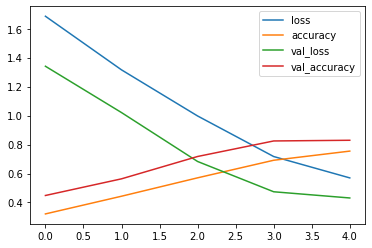

In [ ]:
#pd.DataFrame(loss.history).plot() minimalistic

In [ ]:
model.save('model.h5')

In [ ]:
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
'''
import gzip
import pickle

def evaluate(path, model):
    X, y = pickle.load(gzip.open(path, 'rb'))
    y[y != 0] -= 2
    X = X / 255.
    acc = np.mean(model(X).numpy().argmax(axis=1) == y)
    return acc

model = keras.models.load_model('/content/model.h5')
evaluate('/content/drive/MyDrive/flatland_train.data', model)
'''